# Large igneous province duration

Contextualizing Midcontinent Rift dates with high-quality high-precision dates from other large igneous provinces.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

params = {'ytick.labelsize':'large'}
plt.rcParams.update(params)

## Midcontinent Rift data

In [2]:
MCR_geochron = pd.read_csv('./code_output/MCR_geochron.csv')
MCR_dates = MCR_geochron.sort_values('U_Pb_sample_mean',ascending=False)
MCR_dates.reset_index(inplace=True)
MCR_dates.head()

,index,Unnamed: 0,labels,polarity_colors,U_Pb_zircon_dates,U_Pb_zircon_2sigmas,U_Pb_zircon_include,U_Pb_sample_mean,U_Pb_sample_2sigma
0,0,0,Red Rock Rhyolite,red,"[1108.411461, 1106.18172, 1105.755822, 1105.50...","[1.168486173, 0.85697308, 0.94457975, 0.456200...","['no', 'yes', 'yes', 'yes', 'yes', 'yes']",1105.60,0.32
1,1,1,Agate Point Rhyolite,red,"[1106.5, 1106.0, 1105.66, 1105.41, 1105.05, 11...","[2.21, 0.98, 1.29, 0.63, 0.71, 1.45, 1.91, 0.6...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",1105.15,0.33
2,2,2,Flour Bay tuff,red,"[1104.773494, 1103.700548, 1101.560071, 1101.0...","[1.896362749, 0.866898118, 0.441113108, 1.2440...","['no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',...",1100.36,0.25
3,3,3,Kallander Creek Rhyolite,blue,"[1098.648832, 1098.337682, 1098.17126, 1097.60...","[0.766055169, 0.905348034, 1.129440418, 0.9100...","['yes', 'yes', 'yes', 'yes']",1098.24,0.45
4,4,4,40th Ave Icelandite,blue,"[1098.58, 1097.46, 1097.18, 1096.88, 1096.81, ...","[2.72, 0.73, 0.95, 0.7, 0.8, 0.67, 0.64, 0.99]","['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes...",1096.75,0.28


## NAIP data

In [3]:
NAIP_dates = pd.read_csv('../data/Wilkinson_NAIP_dates.csv')
NAIP_dates['twosigma'] = NAIP_dates['Re-calibrated Error (± 1σ)_NAGTEC']*2
NAIP_dates['date'] = NAIP_dates['Re-calibrated Age_NAGTEC']
NAIP_dates = NAIP_dates.sort_values('date',ascending=False)
NAIP_dates.reset_index(inplace=True)
NAIP_dates.tail()

,index,NAIP Main Region,NAIP Sub-province,Locality 1,Locality 2,Latitude,Longitude,LatLong_accuracy,Formation_Unit,Lithology,...,40Ar/36Ar_Inverse_Isochron_Intercept,40Ar/36Ar_Inverse_Isochron_Intercept (± 1σ),MSWD_Isochron,40Ar/39Ar_Monitor_Mineral,40Ar/39Ar_Monitor_Age,40Ar/39Ar_Monitor (± 1σ),Literature_Reference_Monitor,"Proper_Plateau(39Ar50%,overlap2σ,3steps_minimum)",twosigma,date
81,75,UK,British-Irish Palaeogene Igneous,Outer Hebrides,"Loch Roag, Lewis (Scotland)",59.19,-6.94,Approximate,NaN,Dyke,...,298.8,9.6,0.80,Tinto Biotite,409.20,NaN,"Rex and Guise, Bulletin of Liaison and informa...",Proper plateau,0.22,45.91
82,24,Greenland,East Greenland,NaN,Kap Dalton,69.45,-24.00,Approximate,Igtertivâ Formation (Flow above sediment),Basalt,...,294,13.0,NaN,FCT-3 Biotite,NaN,NaN,"Renne et al., 1998",Proper plateau,1.08,43.77
83,45,Greenland,West Greenland,NaN,Ubekendt Ejland,71.21,-53.89,Reported,NaN,Lamprophyre Dyke,...,298.2,9.8,NaN,Fish Canyon Tuff-3 Biotite,27.84,0.20,"Hurford and Hammerschmidt, Chemical Geology V5...",Proper plateau,0.40,34.75
84,29,Greenland,East Greenland,NaN,Hvalrosø,74.52,-18.75,Reported,Sill,Pegmatite,...,295,8.0,0.27,FCT-3 Biotite,NaN,NaN,"Renne et al., 1998",NaN,0.12,20.31
85,13,Greenland,East Greenland,NaN,Vindtop Formation,69.00,-30.00,Approximate,Vindtop Formation,Basalt,...,294.4,8.9,NaN,Fish Canyon Tuff-3 Biotite,28.03,0.18,"Renne et al., Geology V22, 783-786 (1994)",Proper plateau,0.40,13.56


In [4]:
NAIP_data = pd.read_csv('../data/NAIP_dates.csv')
NAIP_data.dropna(inplace=True)
NAIP_data = NAIP_data.sort_values('date',ascending=False)
NAIP_data.reset_index(inplace=True)
NAIP_data.tail()

,index,date,twosigma
107,16,38.70,2.10
108,13,38.57,0.24
109,71,34.75,0.40
110,164,20.31,0.12
111,111,13.56,0.40


In [5]:
NAIP_data.date.mean()

54.547410714285725

## Deccan Traps data

In [28]:
Sprain_2019 = pd.read_csv('../data/Sprain2019_dates.csv')
Sprain_2019['2_sigma'] =  Sprain_2019['1_sigma_external']*2
Sprain_2019_means = Sprain_2019['Age'].tolist()
Sprain_2019_2sigmas = Sprain_2019['2_sigma'].tolist()
Sprain_2019_ref = ['Sprain2019a'] * len(Sprain_2019_2sigmas)

Tholt_2023 = pd.read_csv('../data/Tholt2023_dates.csv')
Tholt_2023['date'] = pd.to_numeric(Tholt_2023['date'], errors='coerce')
Tholt_2023 = Tholt_2023[Tholt_2023['date'].notna() & (Tholt_2023['date'] > 60)]
Tholt_2023['2_sigma'] = Tholt_2023['sigma_systematic']*2
Tholt_2023_means = Tholt_2023['date'].tolist()
Tholt_2023_2sigmas = Tholt_2023['2_sigma'].tolist()
Tholt_2023_ref = ['Tholt2023a'] * len(Tholt_2023_2sigmas)

Schoene_2019 = pd.read_csv('../data/Schoene2019_weighted_means.csv')
Schoene_2019_means = Schoene_2019['dates'].tolist()
Schoene_2019_2sigmas = Schoene_2019['2_sigma'].tolist()
Schoene_2019_ref = ['Schoene2019a'] * len(Schoene_2019_2sigmas)

Eddy_2020 = pd.read_csv('../data/Eddy2020_dates.csv')
Eddy_2020_means = Eddy_2020['mean_date'].tolist()
Eddy_2020_2sigmas = Eddy_2020['twosigma'].tolist()
Eddy_2020_ref = ['Eddy2020a'] * len(Eddy_2020_2sigmas)

Deccan_data = pd.DataFrame({'mean_dates': Sprain_2019_means + Tholt_2023_means + Schoene_2019_means + Eddy_2020_means, 
                            'twosigma': Sprain_2019_2sigmas + Tholt_2023_2sigmas + Schoene_2019_2sigmas + Eddy_2020_2sigmas,
                            'ref': Sprain_2019_ref + Tholt_2023_ref + Schoene_2019_ref + Eddy_2020_ref})
Deccan_data = Deccan_data[Deccan_data['twosigma'] < 0.5]

Deccan_data = Deccan_data.sort_values('mean_dates',ascending=False)
Deccan_data.reset_index(inplace=True)
Deccan_data.head()

,index,mean_dates,twosigma,ref
0,29,66.834,0.154,Tholt2023a
1,49,66.829,0.204,Tholt2023a
2,31,66.549,0.164,Tholt2023a
3,30,66.514,0.292,Tholt2023a
4,32,66.427,0.212,Tholt2023a


## Karoo-Ferrar data

From Burgess et al., 2015

Need to add data from:
10.25131/sajg.125.0009

In [7]:
Burgess_2015 = pd.read_csv('../data/Burgess2015_dates.csv')
Karoo_data = Burgess_2015.sort_values('mean_date',ascending=False)
Karoo_data.reset_index(inplace=True)
Karoo_data.head()

,index,mean_date,twosigma
0,16,183.246,0.045
1,5,182.850,0.340
2,6,182.778,0.033
3,7,182.776,0.059
4,8,182.753,0.037


In [8]:
Karoo_data.mean_date.mean()

182.68423809523813

## CAMP data

In [9]:
CAMP_data = pd.read_csv('../data/CAMP_dates.csv')
CAMP_data.dropna(inplace=True)
CAMP_data = CAMP_data.sort_values('date',ascending=False)
CAMP_data.reset_index(inplace=True)
CAMP_data.head()

,index,date,twosigma,ref
0,6,201.635,0.029,Davies2017
1,9,201.612,0.046,Davies2017
2,2,201.585,0.034,Davies2017
3,10,201.566,0.031,Blackburn2013
4,11,201.564,0.054,Blackburn2013


In [10]:
CAMP_data.date.mean()

201.4294210526316

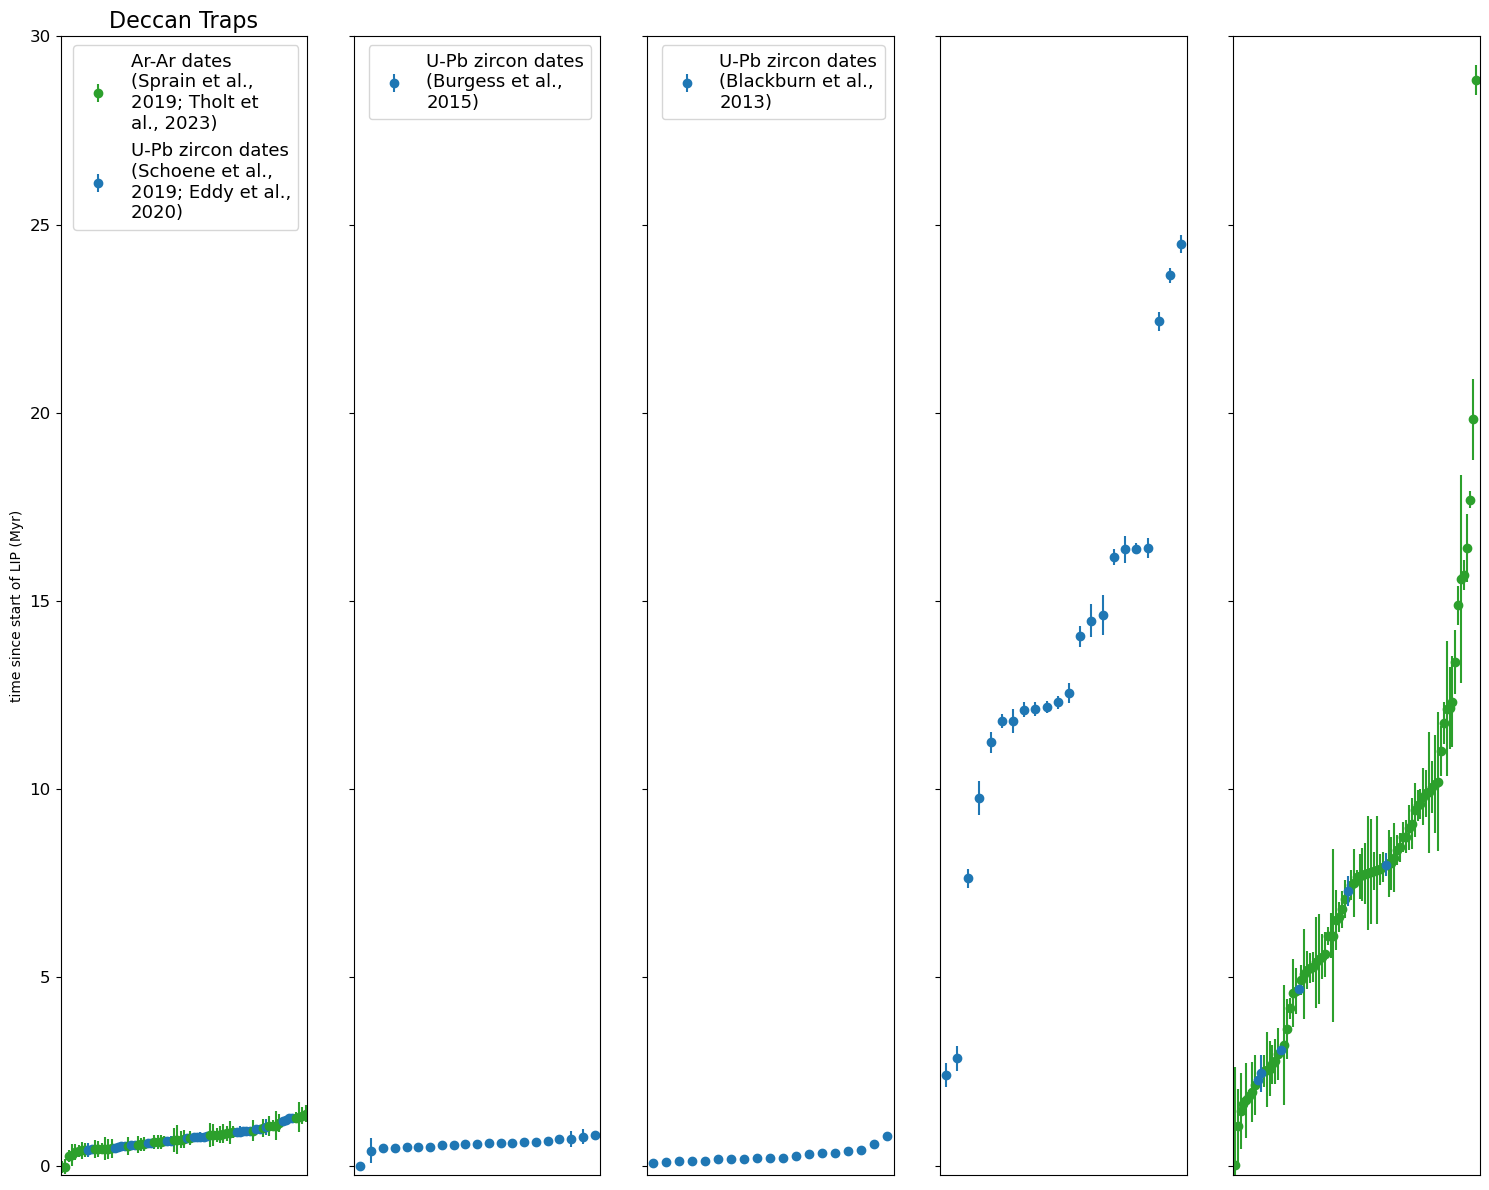

In [32]:
from textwrap import wrap
from collections import OrderedDict

def add_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    valid = [(h, l) for h, l in zip(handles, labels) if l and not l.startswith('_')]
    dedup = OrderedDict()
    for h, l in valid:
        if l not in dedup:
            dedup[l] = h
    wrapped_labels = ["\n".join(wrap(l, 18)) for l in dedup.keys()]
    ax.legend(dedup.values(), wrapped_labels,
              loc='upper right', frameon=True, fontsize=13)

fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15,12))
ax = axs[0]
for n in range(0,len(Deccan_data)):
    if Deccan_data.ref[n] == 'Schoene2019a' or Deccan_data.ref[n] == 'Eddy2020a':
        ax.errorbar(n,66.8-Deccan_data.mean_dates[n], yerr=Deccan_data.twosigma[n],color='C0',fmt='o', 
                    label='U-Pb zircon dates (Schoene et al., 2019; Eddy et al., 2020)')
    elif Deccan_data.ref[n] == 'Sprain2019a' or Deccan_data.ref[n] == 'Tholt2023a':
        ax.errorbar(n,66.8-Deccan_data.mean_dates[n], yerr=Deccan_data.twosigma[n],color='C2',fmt='o', 
                    label='Ar-Ar dates (Sprain et al., 2019; Tholt et al., 2023)')
ax.get_xaxis().set_visible(False)
ax.set_ylabel('time since start of LIP (Myr)')
ax.set_xlim([-0.5,len(Deccan_data)-0.5])
add_legend(ax)
ax.set_title('Deccan Traps',fontsize=16)
    
ax = axs[1]
for n in range(0,len(Karoo_data)):
    ax.errorbar(n,183.25-Karoo_data.mean_date[n], yerr=Karoo_data.twosigma[n],color='C0',fmt='o', 
                    label='U-Pb zircon dates (Burgess et al., 2015)')
ax.get_xaxis().set_visible(False)
ax.set_xlim([-0.5,len(Karoo_data)-0.5])
add_legend(ax)

ax = axs[2]

for n in range(0,len(CAMP_data)):
    ax.errorbar(n,201.7-CAMP_data.date[n], yerr=CAMP_data.twosigma[n],color='C0',fmt='o', 
                    label='U-Pb zircon dates (Blackburn et al., 2013)')
ax.get_xaxis().set_visible(False)
ax.set_xlim([-0.5,len(CAMP_data)-0.5])
add_legend(ax)
    
ax = axs[3]
for n in range(0,len(MCR_dates)):
    ax.errorbar(n,1108-MCR_dates.U_Pb_sample_mean[n], yerr=MCR_dates.U_Pb_sample_2sigma[n],color='C0',fmt='o')
ax.get_xaxis().set_visible(False)
ax.set_xlim([-0.5,len(MCR_dates)-0.5])
 
ax = axs[4]
for n in range(0,len(NAIP_dates)):
    if NAIP_dates['Geochronological Method'][n] == 'Ar/Ar':
        ax.errorbar(n,63.6-NAIP_dates.date[n], yerr=NAIP_dates.twosigma[n],color='C2',fmt='o')
    elif NAIP_dates['Geochronological Method'][n] == 'U/Pb':
        ax.errorbar(n,63.6-NAIP_dates.date[n], yerr=NAIP_dates.twosigma[n],color='C0',fmt='o',zorder=1000)
ax.get_xaxis().set_visible(False)
ax.set_xlim([-0.5,len(NAIP_dates)-1.5])

plt.ylim(-0.25,30)

plt.tight_layout()
plt.savefig('LIP_dates.pdf')

In [20]:
MCR_dates

,index,Unnamed: 0,labels,polarity_colors,U_Pb_zircon_dates,U_Pb_zircon_2sigmas,U_Pb_zircon_include,U_Pb_sample_mean,U_Pb_sample_2sigma
0,0,0,Red Rock Rhyolite,red,"[1108.411461, 1106.18172, 1105.755822, 1105.50...","[1.168486173, 0.85697308, 0.94457975, 0.456200...","['no', 'yes', 'yes', 'yes', 'yes', 'yes']",1105.600000,0.320000
1,1,1,Agate Point Rhyolite,red,"[1106.5, 1106.0, 1105.66, 1105.41, 1105.05, 11...","[2.21, 0.98, 1.29, 0.63, 0.71, 1.45, 1.91, 0.6...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",1105.150000,0.330000
2,2,2,Flour Bay tuff,red,"[1104.773494, 1103.700548, 1101.560071, 1101.0...","[1.896362749, 0.866898118, 0.441113108, 1.2440...","['no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',...",1100.360000,0.250000
3,3,3,Kallander Creek Rhyolite,blue,"[1098.648832, 1098.337682, 1098.17126, 1097.60...","[0.766055169, 0.905348034, 1.129440418, 0.9100...","['yes', 'yes', 'yes', 'yes']",1098.240000,0.450000
4,4,4,40th Ave Icelandite,blue,"[1098.58, 1097.46, 1097.18, 1096.88, 1096.81, ...","[2.72, 0.73, 0.95, 0.7, 0.8, 0.67, 0.64, 0.99]","['no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes...",1096.750000,0.280000
5,13,13,Partridge River intrusion,darkblue,"[1096.3692956957627, 1096.3411986087767, 1096....","[0.4540650746678668, 0.44939847012038203, 0.45...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes']",1096.194915,0.188294
6,5,5,Two Harbors Icelandite,blue,"[1097.33, 1096.44, 1096.27, 1096.08, 1095.74]","[0.71, 0.57, 0.59, 0.7, 0.71]","['no', 'yes', 'yes', 'yes', 'yes']",1096.180000,0.320000
7,14,14,Bald Eagle intrusion,darkblue,"[1096.1747761266788, 1096.0388091332786, 1095....","[0.4484241145264616, 0.45859332803922687, 0.48...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes']",1095.884576,0.190780
8,15,15,Duluth area anorthositic series (AS3),darkblue,"[1096.23, 1096.09, 1095.97, 1095.94, 1095.8, 1...","[0.88, 0.58, 0.5, 0.49, 0.49, 0.46, 0.49, 0.57]","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",1095.862213,0.187112
9,16,16,Forest Center anorthositic series (FC-1),darkblue,"[1096.2692620731762, 1096.190625997245, 1095.9...","[0.5108447698370121, 0.5053458354644664, 0.509...","['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...",1095.806484,0.158034
